In [1]:
%load_ext autoreload
%autoreload 2
# %matplotlib widget

import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID" 
os.environ["CUDA_VISIBLE_DEVICES"] = '2'

from encoding_information.gpu_utils import limit_gpu_memory_growth  
limit_gpu_memory_growth()

from cleanplots import *
from tqdm import tqdm
from signal_utils_1D import *
from plot_utils_1D import *

/home/hpinkard_waller/mambaforge/envs/phenotypes/lib/python3.10/site-packages/jax/_src/api_util.py:172: SyntaxWarning: Jitted function has static_argnums=(1,), but only accepts 1 positional arguments. This warning will be replaced by an error after 2022-08-20 at the earliest.
  warnings.warn(f"Jitted function has {argnums_name}={argnums}, "


## Generate many objects in parallel

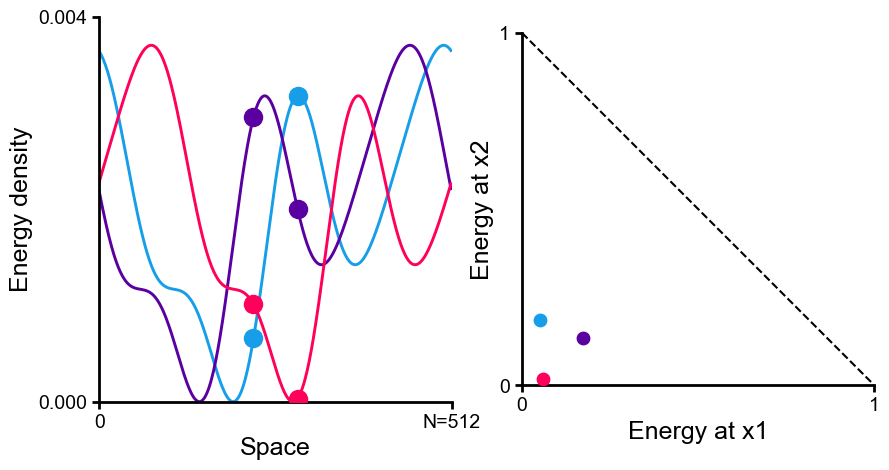

In [2]:
num_nyquist_samples = 8

n_objects = 20
objects = np.array([generate_random_object('delta') for i in range(n_objects)])

# generate random convolution kernel
random_kernel = signal_from_params(generate_params_of_random_signal(num_nyquist_samples=num_nyquist_samples))
conv_mat = make_convolutional_encoder(random_kernel)

output_signals = objects @ conv_mat.T 


sampling_indices = (3, 4)
num_to_plot = 3

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
plot_in_spatial_coordinates(ax[0], output_signals[:num_to_plot], sampling_indices=sampling_indices)
plot_in_intensity_coordinates(ax[1], output_signals[:num_to_plot], sampling_indices=sampling_indices, plot_signals_in_different_colors=True)

## 2D plot of space mapped to by single delta function vs multiple

In [3]:
sampling_indices = (3, 4)

grid_density = 15

objects = [generate_random_object('delta', num_deltas=1), 
                 generate_random_object('delta', num_deltas=2),
                    generate_random_object('delta', num_deltas=8)]
labels = ['1 peak', '2 peaks', '8 peaks']


target_integrated_signals = make_intensity_coordinate_sampling_grid(sampling_indices, sample_n=grid_density)

sets_of_output_signals = []
initial_kernel = signal_from_params(generate_params_of_random_signal(num_nyquist_samples=num_nyquist_samples))
for object in objects:
    optimized_kernels, output_signals = optimize_towards_target_signals(target_integrated_signals, object, initial_kernel, sampling_indices=sampling_indices, verbose=True)
    sets_of_output_signals.append(output_signals)


  0%|          | 0/118 [00:00<?, ?it/s]

initial loss 0.020365983


  0%|          | 0/118 [00:06<?, ?it/s]

KeyboardInterrupt: 

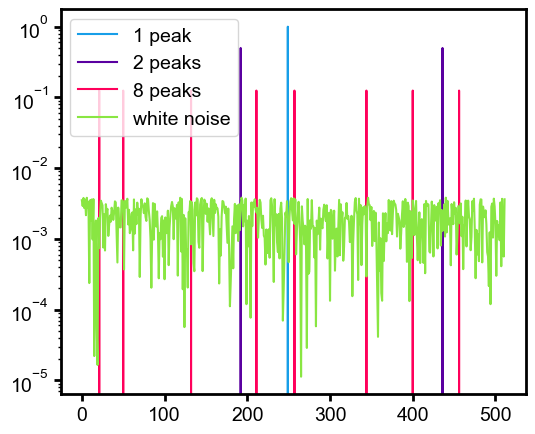

In [8]:

objects = [generate_random_object('delta', num_deltas=1), 
                 generate_random_object('delta', num_deltas=2),
                    generate_random_object('delta', num_deltas=8),
                    generate_random_object('white_noise')
                    ]
labels = ['1 peak', '2 peaks', '8 peaks', 'white noise']

fig, ax = plt.subplots(1, 1, figsize=(6, 5))
for i, (input_signal, label) in enumerate(zip(objects, labels)):
    ax.semilogy(input_signal, label=label)
    # plot_in_spatial_coordinates(ax, input_signal, show_samples=False, label=label)
ax.legend()
# set y log scale


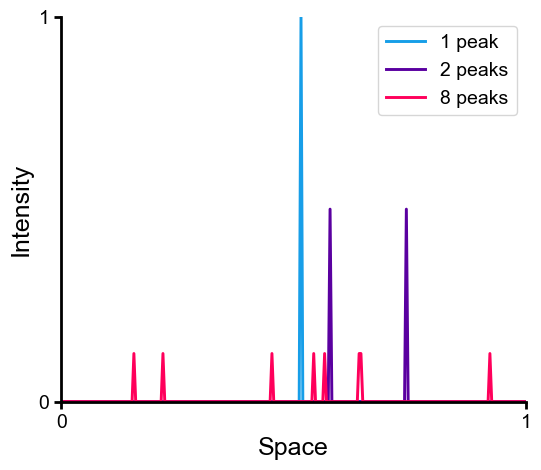

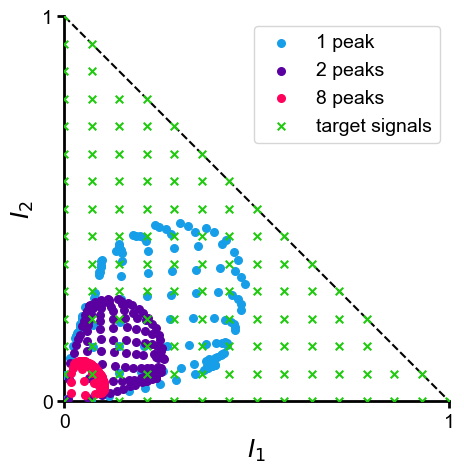

In [4]:
# make a 3x1 plot with shared x and y axes showing the input signals
fig, ax = plt.subplots(1, 1, figsize=(6, 5))
for i, (input_signal, label) in enumerate(zip(objects, labels)):
    plot_in_spatial_coordinates(ax, input_signal, show_samples=False, label=label)
ax.legend()


fig, ax = plt.subplots(1, 1, figsize=(6, 5))
for output_signals, label in zip(sets_of_output_signals, labels):
    plot_in_intensity_coordinates(ax, output_signals, label=label, sample_point_indices=sampling_indices)
plot_in_intensity_coordinates(ax, target_integrated_signals, label='target signals',  marker='x',  sample_point_indices=sampling_indices, color='k')
ax.legend()